# Canal Peixe Babel
Visite: http://youtube.com/CanalPeixeBabel

Referência: Twitter Crawler <br>
https://gist.github.com/vickyqian/f70e9ab3910c7c290d9d715491cde44c

### Chaves secretas

In [0]:
import tweepy

# Preencha a seguir com as suas chaves de API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

### Implementação

In [0]:
# Validação de tokens de acesso
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [0]:
tweets = tweepy.Cursor(api.search,q="#FalaProgramadores",
                           lang="pt", since="2019-10-01").items()

In [0]:
split_token = ':-'
split_lang  = ' ,/'
ignore = '('

respostas = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[]}

for tweet in tweets:
  
  # Get text
  ids = tweet.id
  status = api.get_status(ids, tweet_mode="extended")
  fulltext = status.full_text
  
  # Split lines
  lines = fulltext.split('\n')
  
  for line in lines:
    
    # Coisas para ignorar na linha #
    if line.find('http') != -1:
      line = line[:line.find('http')]
      
    if line.find('(') != -1:
      line = line[:line.find('(')]
    if len(line) == 0: continue
    ################################
    
    # Linhas com resposta válida #
    if line[0] in '123456':
      if line.find(':') != -1:
        answers = line.split(':')[-1:]
      else:
        answers = line.split('-')[-1:]
    
      languages = answers
      for token in split_lang:
        
        list_langs = []
        for lang in languages:
          list_langs.extend(lang.split(token))
          
        languages = list_langs
        
      languages = [l.upper() for l in languages if len(l) > 0] 
      
      respostas[int(line[0])].extend(languages)

In [0]:
len(respostas[1])

516

In [0]:
stopwords = ['primeira', 'linguagem', '&gt;', 'um', 'Minha', 'Conseguiu', 'foi', 'amigo', 'estudei',
            'teve', 'especificação', 'todas', 'jeito', 'nenhum', 'dificuldade', 'funcionais', 'as', 
             'vc', 'ou', 'tipada', 'mais', 'tive', 'com', 'materias', 'para', 'iniciantes', 'qualquer',
            'Qqer', 'estruturada', 'não', 'gostou', 'de', 'das', 'antiga', 'e', 'que', 'util...','utilizou',
            '&LT;3', 'a', 'p', 'acho', 'recomenda', 'você', 'começar']

stopwords = [word.upper() for word in stopwords]

for key in respostas.keys():
  new_respostas = []
  for word in respostas[key]:
    if word not in stopwords:
      new_respostas.append(word)
      
  respostas[key] = new_respostas 

In [0]:
!wget https://github.com/google/fonts/blob/master/ofl/cabinsketch/CabinSketch-Bold.ttf?raw=true

--2019-10-07 19:10:40--  https://github.com/google/fonts/blob/master/ofl/cabinsketch/CabinSketch-Bold.ttf?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/google/fonts/raw/master/ofl/cabinsketch/CabinSketch-Bold.ttf [following]
--2019-10-07 19:10:40--  https://github.com/google/fonts/raw/master/ofl/cabinsketch/CabinSketch-Bold.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/fonts/master/ofl/cabinsketch/CabinSketch-Bold.ttf [following]
--2019-10-07 19:10:40--  https://raw.githubusercontent.com/google/fonts/master/ofl/cabinsketch/CabinSketch-Bold.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.

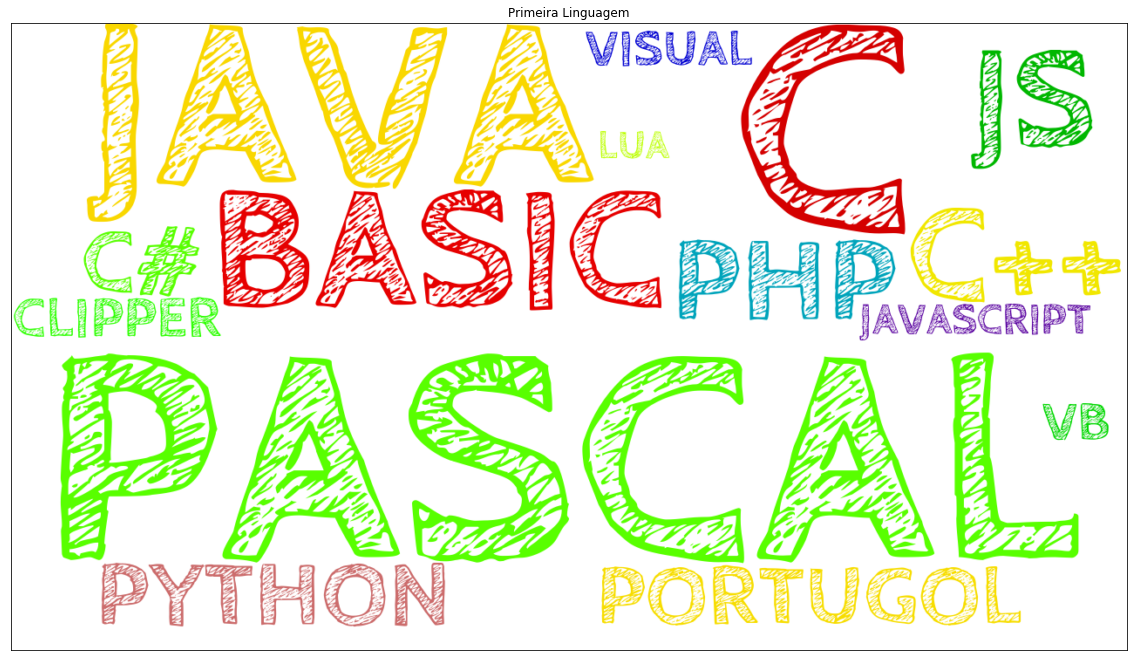

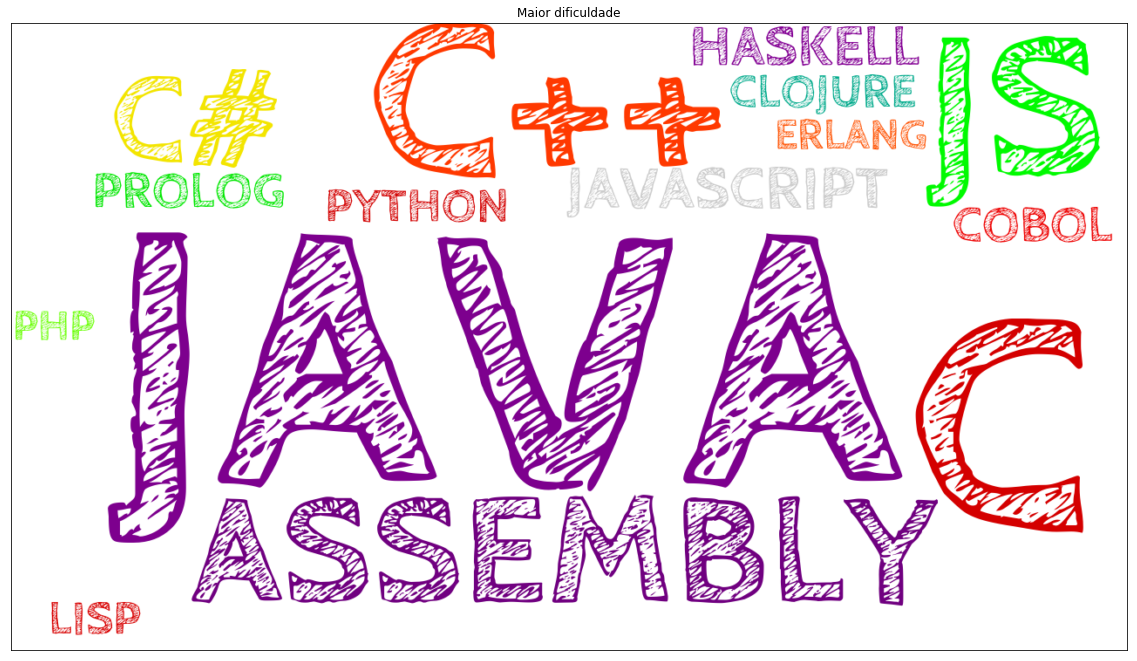

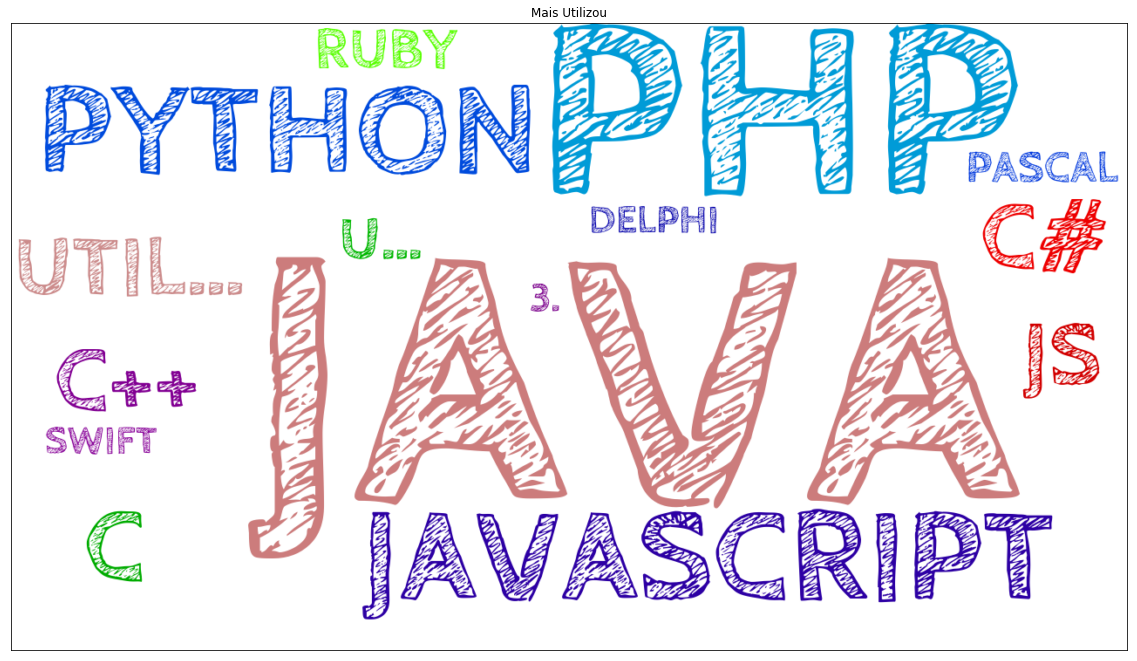

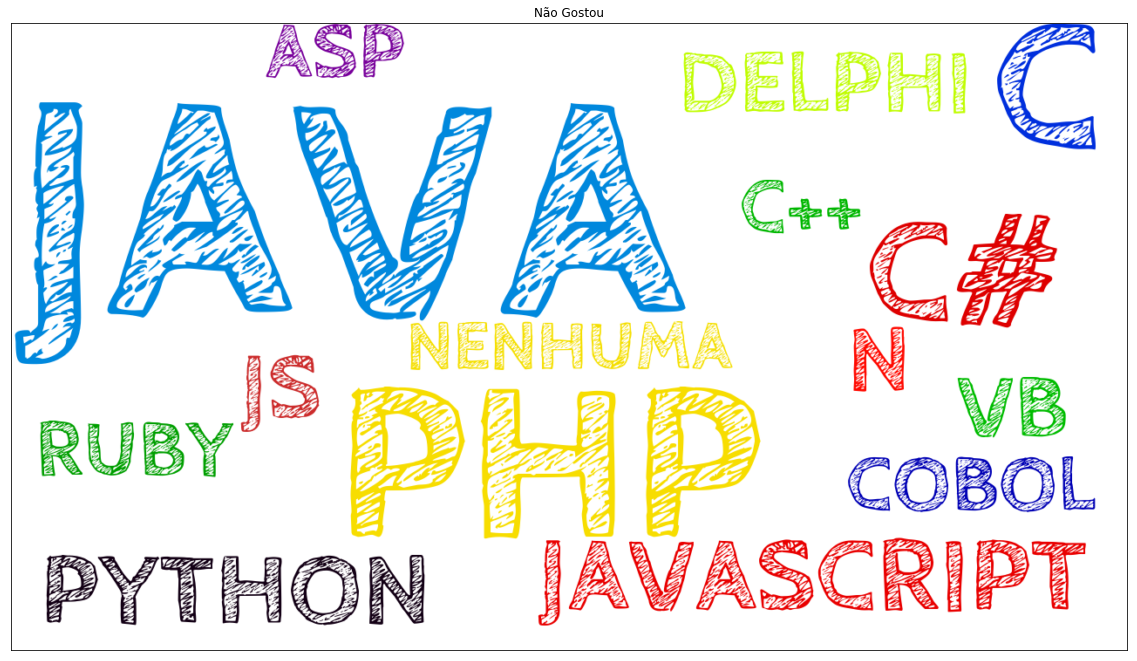

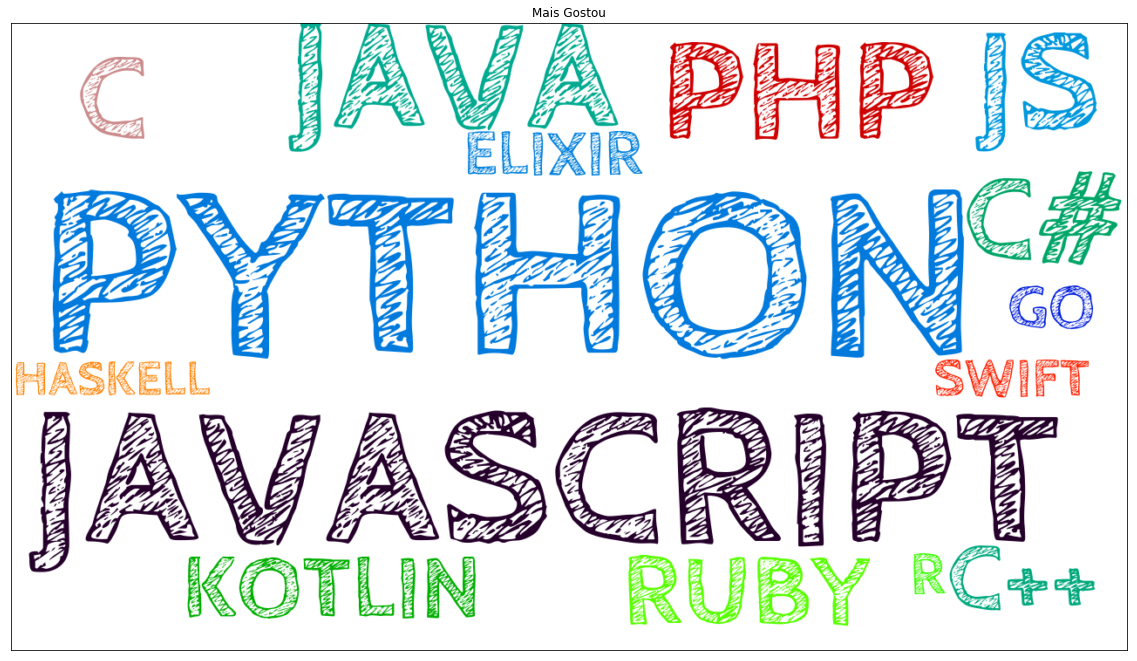

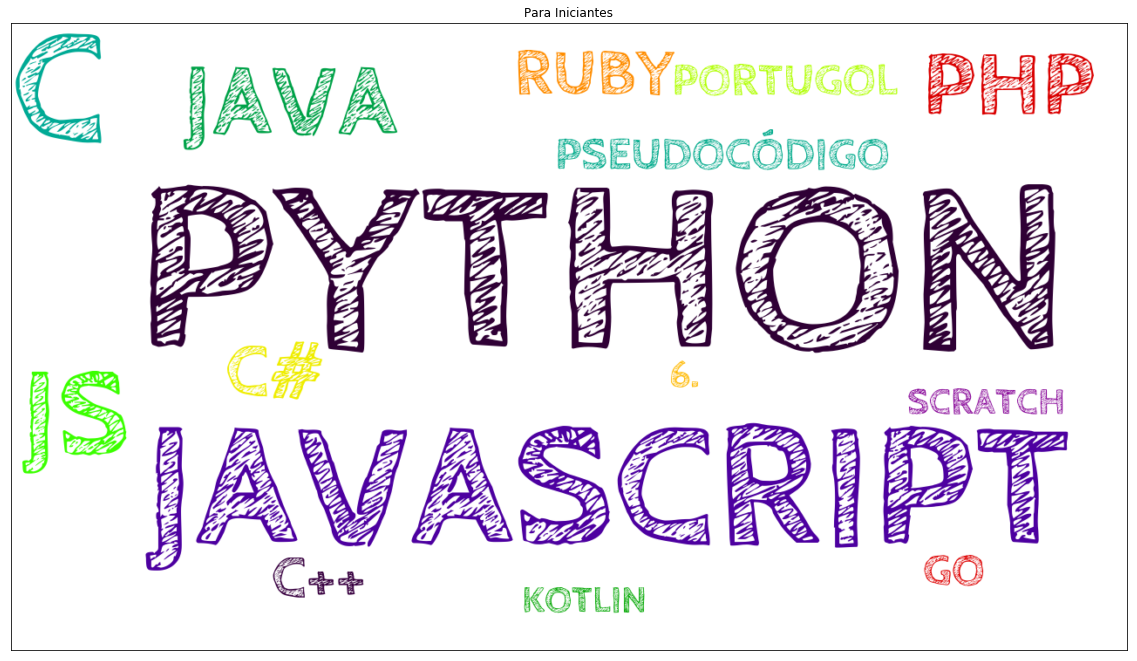

In [0]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline

keys = {1: 'Primeira Linguagem', 2: 'Maior dificuldade', 3: 'Mais Utilizou', 4: 'Não Gostou', 5: 'Mais Gostou', 6: 'Para Iniciantes'}

for key in respostas.keys():
  texto = {}
  for lang in respostas[key]:
    if lang not in texto:
      texto[lang] = 1
    else:
      texto[lang] += 1
    
  wordcloud = WordCloud(stopwords=stopwords,
                        width=1280, height=720,
                       background_color='white',
                       max_words=15,
                       colormap=plt.cm.nipy_spectral,
                       font_path='CabinSketch-Bold.ttf?raw=true',
                       relative_scaling = .5,
                       prefer_horizontal=True).fit_words(texto)
  
  fig = plt.figure(figsize=(11, 9))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.xticks([])
  plt.yticks([])
  plt.title(keys[key])
  plt.imsave(str(key)+'.png', wordcloud, format='png', dpi=500)
  plt.show()